<a href="https://colab.research.google.com/github/banteamlak1888/ML_project_2025/blob/main/Task5_Train_test__Model_perform_After_Data_Balancing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size="5" color="red"> <b> Generat CSV file or dataset from 'X' attribute as Data and  'Y' as a Class</b></font>

In [ ]:
import pandas as pd
import numpy as np
!pip install tensorflow


* <font size="5" color="green"> <b>X</b> </font>   =X[['ph'  'Hardness' 'Solids' 'Chloramines' 'Sulfate'  'Conductivity' 'Organic_carbon' 'Trihalomethanes'  'Turbidity']]

* <font size="5" color="green"> <b> Y</b> </font>=Y['Potability']</b>

In [7]:
X=pd.read_csv('Data.csv')
Y=pd.read_csv('Class.csv')
print(Y.head())
X.head()

   Potability
0           0
1           0
2           0
3           0
4           0


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


In [ ]:
#

In [11]:
from sklearn.exceptions import ConvergenceWarning

from warnings import simplefilter

simplefilter(action='ignore', category=ConvergenceWarning)

In [20]:
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

from sklearn.model_selection import train_test_split


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict


from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

 <font size="2" color="green"> <b> Standardization </b> </font>
<details>
* from sklearn.preprocessing import StandardScaler
* scaler=StandardScaler()

* fit only on training data
* scaler.fit(X_train)
* X_train=scaler.fit_transform(X_train)

* apply same transformation to test data
* X_test=sc_X.transform(X_test)

* result will be from 0 to 1 or from -1 to +1
* X_train



</details>

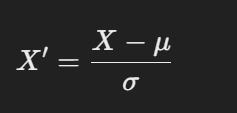

In [13]:
from IPython.display import Image
display(Image(filename="s.PNG"))

<font size="2" color="green"> <b> Normalization </b> </font>
<details> Normalization rescales data into a fixed range, typically [0,1] or [-1,1].
</details>

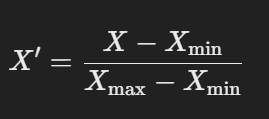

In [14]:
from IPython.display import Image
display(Image(filename="n.PNG"))

<font size="4" color="green"> <b>For train 80% and for test 20% </b> </font>

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2, random_state=7)

from sklearn.preprocessing import MinMaxScaler
sc_X=MinMaxScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)
#X_train #result is between 0 and 1
y_train


,Potability
619,0
1197,1
801,1
3915,1
739,1
...,...
1603,1
2550,0
537,0
1220,1


#

<h1><font size=25, face='Times New Roman' , color="blue">1. Support Vector Machine</font></h1>

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



****************************************************************

Accuracy                     :  71.125 %
Precision / 1-Sensitivity    :  68.8787185354691 %
Recall / Sensitivity         :  76.01010101010101 %
F1 Score                     :  72.26890756302521 %
________________________________________________________________

Confusion Matrix

 [[268 136]
 [ 95 301]]

****************************************************************


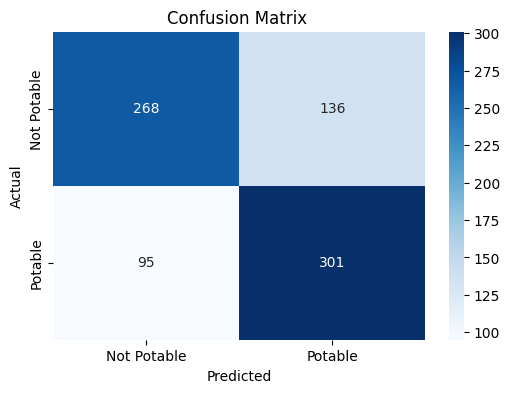

In [24]:
#gamma='auto', kernel='rbf'
svm_classifier=SVC(C=100, random_state=0)
svm_classifier.fit(X_train,y_train)
svm_pred=svm_classifier.predict(X_test)

print('\n****************************************************************\n')
print('Accuracy                     : ',accuracy_score(y_test,svm_pred)*100,'%')
print('Precision / 1-Sensitivity    : ',precision_score(y_test,svm_pred)*100,'%')
print('Recall / Sensitivity         : ',recall_score(y_test,svm_pred)*100,'%')
print('F1 Score                     : ',f1_score(y_test,svm_pred)*100,'%')
print('________________________________________________________________\n')

print('Confusion Matrix\n')
print('',confusion_matrix(y_test,svm_pred))
print('\n****************************************************************')
# Compute confusion matrix
cm = confusion_matrix(y_test, svm_pred)
# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Potable", "Potable"], yticklabels=["Not Potable", "Potable"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix ")
plt.show()

<font size=20, color="blue" face='Times New Roman'>K-Fold-SVM</font>

In [25]:
svm_pred=cross_val_predict(svm_classifier,X_test, y_test)

#change the value of cv to see the change
scores_test=cross_val_score(svm_classifier,X_test, y_test, cv=7)
print("Average : ",np.mean(scores_test)*100,'%')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Average :  61.00141658494061 %


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#

<h1><font size=25, color="blue" face='Times New Roman'>2. Decision Tree</font></h1>


****************************************************************

Accuracy                     :  71.375 %
Precision / 1-Sensitivity    :  67.88008565310493 %
Recall / Sensitivity         :  80.05050505050505 %
F1 Score                     :  73.46465816917728 %
________________________________________________________________

Confusion Matrix

 [[254 150]
 [ 79 317]]

****************************************************************


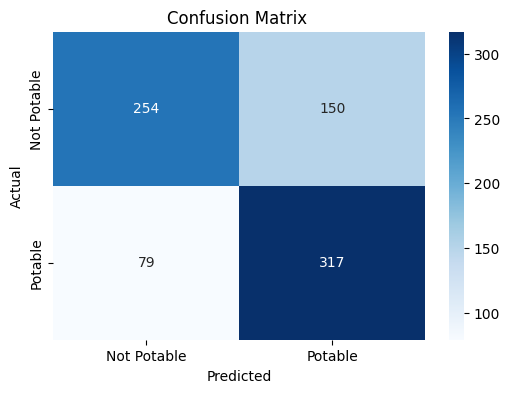

In [26]:
#X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2, random_state=5)
#max_leaf_nodes=8,criterion='entropy', max_depth=10, max_features=9, min_samples_split= 2
dt_classifier=DecisionTreeClassifier(random_state=7)
dt_classifier.fit(X_train,y_train)
dt_pred=dt_classifier.predict(X_test)
print('\n****************************************************************\n')
print('Accuracy                     : ',accuracy_score(y_test,dt_pred)*100,'%')
print('Precision / 1-Sensitivity    : ',precision_score(y_test,dt_pred)*100,'%')
print('Recall / Sensitivity         : ',recall_score(y_test,dt_pred)*100,'%')
print('F1 Score                     : ',f1_score(y_test,dt_pred)*100,'%')
print('________________________________________________________________\n')
print('Confusion Matrix\n')
print('',confusion_matrix(y_test,dt_pred))
print('\n****************************************************************')
# Compute confusion matrix
cm = confusion_matrix(y_test, dt_pred)
# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Potable", "Potable"], yticklabels=["Not Potable", "Potable"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix ")
plt.show()

<font size=20, color="blue" face='Times New Roman'>K-Fold-DT</font>

In [27]:

dt_pred=cross_val_predict(dt_classifier,X_test, y_test)
scores_test=cross_val_score(dt_classifier,X_test, y_test, cv=7)
print("Average : ",np.mean(scores_test)*100,'%')

Average :  60.62656641604009 %


#

<h1><font size=25, color="blue" face='Times New Roman'>3. Sequential Neural Network</font></h1>

In [28]:
mod_sq=Sequential()
mod_sq.add(Dense(200,input_dim=9,activation='relu'))
mod_sq.add(Dense(200,input_dim=200,activation='relu'))
mod_sq.add(Dense(1,activation='sigmoid'))
mod_sq.compile(loss='mse', optimizer='adam', metrics=['accuracy']) #  metrics=['accuracy']

history=mod_sq.fit(X_train, y_train, epochs=30, batch_size=8, validation_data=(X_train, y_train), verbose=1)

loss, accuracy = mod_sq.evaluate(X_test, y_test)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4892 - loss: 0.2524 - val_accuracy: 0.5013 - val_loss: 0.2507
Epoch 2/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5122 - loss: 0.2503 - val_accuracy: 0.5735 - val_loss: 0.2465
Epoch 3/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5525 - loss: 0.2458 - val_accuracy: 0.5926 - val_loss: 0.2396
Epoch 4/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5834 - loss: 0.2380 - val_accuracy: 0.6155 - val_loss: 0.2322
Epoch 5/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6250 - loss: 0.2295 - val_accuracy: 0.6386 - val_loss: 0.2246
Epoch 6/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6362 - loss: 0.2279 - val_accuracy: 0.6370 - val_loss: 0.2207
Epoch 7/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.6265 - loss: 0.2238 - val_accuracy: 0.6383 - val_loss: 0.2211
Epoch 8/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6246 - loss: 0.2216 - val_accuracy: 0

# New Section

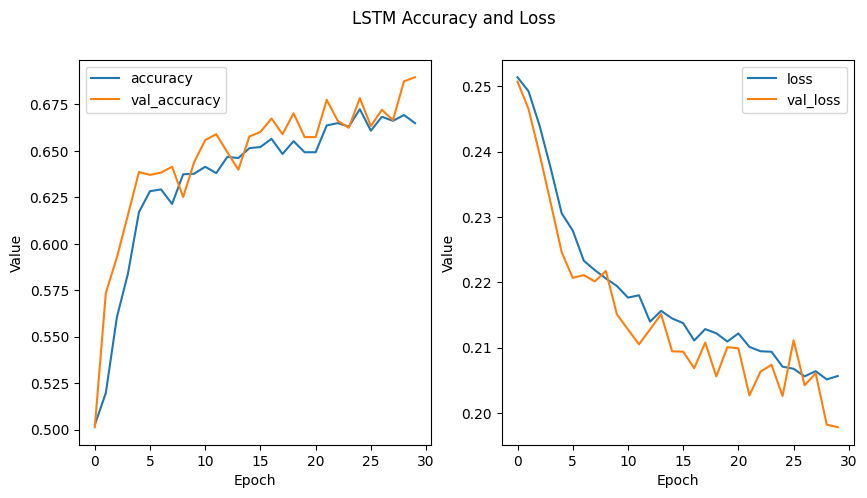

In [29]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the accuracy and validation accuracy curves in the first subplot
axs[0].plot(history.history['accuracy'], label='accuracy')
axs[0].plot(history.history['val_accuracy'], label='val_accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Value')
axs[0].legend()

# Plot the loss and validation loss curves in the second subplot
axs[1].plot(history.history['loss'], label='loss')
axs[1].plot(history.history['val_loss'], label='val_loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Value')
axs[1].legend()

fig.suptitle('LSTM Accuracy and Loss')
# Display the figure
plt.show()

In [30]:

predictions=mod_sq.predict(X_test)
sq_pred = (predictions > 0.5)
confusion_matrix(y_test, sq_pred)
# print('Precision       : ',precision_score(y_test, sq_pred)*100,'%')
# print('Recall          : ',recall_score(y_test, sq_pred)*100,'%')
# print('F1 Score        : ',f1_score(y_test, sq_pred)*100,'%')
print(np.mean(predictions))

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
0.49809304


In [32]:
cm=confusion_matrix(y_test, sq_pred)
print('Cofusion Matrix\n',cm)

Cofusion Matrix
 [[276 128]
 [159 237]]


#

<font size=20, color= "blue" face='Times New Roman'>4. MLPC</font>

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy                     :  49.375 %
Precision / 1-Sensitivity    :  48.825065274151434 %
Recall / Sensitivity         :  47.22222222222222 %
F1 Score                     :  48.010269576379976 %
________________________________________________________________

Confusion Matrix

 [[208 196]
 [209 187]]

****************************************************************


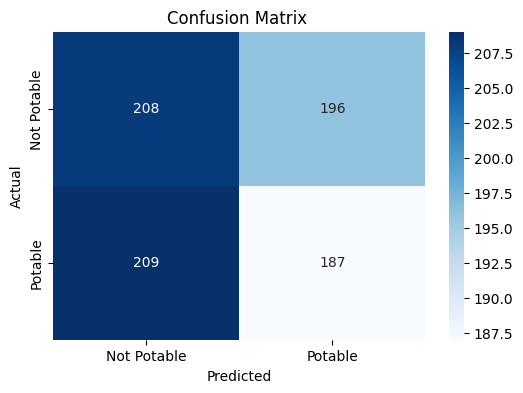

In [35]:
#NN MLPC
mod_nn=MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=(5), random_state=7)
mod_nn.fit(X_train, y_train)
nn_pred1=mod_nn.predict(X_test)
print('Accuracy                     : ',accuracy_score(y_test,nn_pred1)*100,'%')
print('Precision / 1-Sensitivity    : ',precision_score(y_test,nn_pred1)*100,'%')
print('Recall / Sensitivity         : ',recall_score(y_test,nn_pred1)*100,'%')
print('F1 Score                     : ',f1_score(y_test,nn_pred1)*100,'%')
print('________________________________________________________________\n')
print('Confusion Matrix\n')
print('',confusion_matrix(y_test,nn_pred1))
print('\n****************************************************************')
# Compute confusion matrix
cm = confusion_matrix(y_test, nn_pred1)
# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Potable", "Potable"], yticklabels=["Not Potable", "Potable"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix ")
plt.show()

<font size=20, color="blue" face='Times New Roman'>K-Fold-MLPC</font>

In [36]:
nn_pred2=cross_val_predict(mod_nn,X_test,y_test)
scores_test=cross_val_score(mod_nn,X_test, y_test, cv=7)
print("K-Fold Average : ",np.mean(scores_test)*100,'%')

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed w

K-Fold Average :  51.0057753078348 %


<h1><font size=25, color="blue"face='Times New Roman'>5. Naive Bayes</font></h1>


****************************************************************

Accuracy                     :  55.625 %
Precision / 1-Sensitivity    :  55.26992287917738 %
Recall / Sensitivity         :  54.292929292929294 %
F1 Score                     :  54.77707006369427 %
________________________________________________________________

Confusion Matrix

 [[230 174]
 [181 215]]

****************************************************************


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


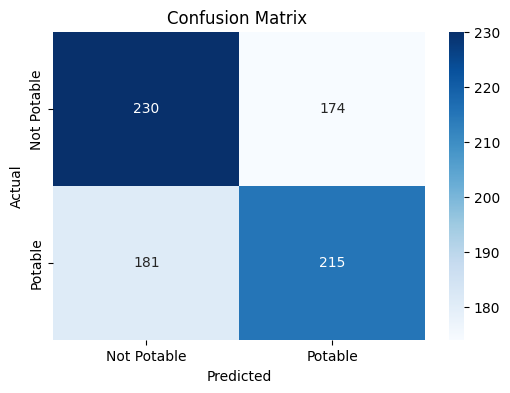

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2, random_state=7)

nb_classifier=MultinomialNB()
nb_classifier.fit(X_train,y_train)
nb_pred=nb_classifier.predict(X_test)
print('\n****************************************************************\n')
print('Accuracy                     : ',accuracy_score(y_test,nb_pred)*100,'%')
print('Precision / 1-Sensitivity    : ',precision_score(y_test,nb_pred)*100,'%')
print('Recall / Sensitivity         : ',recall_score(y_test,nb_pred)*100,'%')
print('F1 Score                     : ',f1_score(y_test,nb_pred)*100,'%')
print('________________________________________________________________\n')
print('Confusion Matrix\n')
print('',confusion_matrix(y_test,nb_pred))
print('\n****************************************************************')
# Compute confusion matrix
cm = confusion_matrix(y_test, nb_pred)
# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Potable", "Potable"], yticklabels=["Not Potable", "Potable"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix ")
plt.show()

<font size=20, color="blue" face='Times New Roman'>K-Fold-NB</font>

In [39]:

nb_pred=cross_val_predict(nb_classifier,X_test, y_test)
scores_test=cross_val_score(nb_classifier,X_test, y_test, cv=10)
print("Average : ",np.mean(scores_test)*100,'%')

Average :  56.125 %


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam